<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML"></script>
<script type="text/x-mathjax-config"> MathJax.Hub.Config({ tex2jax: {inlineMath: [['$', '$']]}, messageStyle: "none" });</script>


## 1. Create a suitable mesh for the problem

* Create hexahedral mesh (2 elements per layer in thickness direction should be sufficient). **(1 Point)**.
* Use 2nd order elements (element type HEX20). **(0.5 Points)**.
* Define the necessary regions, assign meaningful names and show the mesh.  **(0.5 Points)** 

To reproduce the geomertry, just take the file [homework2.jou](homework2.jou)
The mesh of the structure looks as following:<br><br>
<img src="images1/mesh_upView.png" alt="Image 1" style="width:350px; height:250px; text-align:center" /> <br><br>
Mesh of the PMMA Plate (left) and piezo patches (right, only one is displayed, since all patches are meshed the same way)<br>
<img src="images1/meshPlate.png" alt="Image 1" style="width:300px; height:180px;" /> <img src="images1/meshPatch.png" alt="Image 1" style="width:300px; height:180px;" />





### Modelling assumptions

What are the modelling assumptions in the conducted simulation? Consider PDEs, boundary conditions, material models, and analysis type, ... (**2 Points**)

**1. PDEs**

  - We solve mechanic- electric PDEs. We have a mechanical and an electrical PDE
  - Electrical: $ \nabla \times E  = 0 \Longleftrightarrow E = - \nabla \Phi $ and $\nabla \cdot D = 0$
  - Mechanical: $ \rho \cdot \frac{\partial² u}{\partial t²} = \nabla \cdot \sigma + g  $
- The two equations are coupled via **volume coupling** by inserting the following terms for $\sigma , D$:
  - $ \sigma = C^E : s - e \cdot E $ (mechanical field couples on E-field)
  - $ D = e : s + \epsilon^S \cdot E $ (electrical field couples on mechanical strains)
- We instroduce Ansatz functions for both the unknowns to solve:
  - For the mechanical displacement $u$:    $u = \sum_i x_i u^*_i $ with unknown coefficients $x_i$ and known shape functions $u^*_i$ (note that the displacement is a vector quantity)
  - For the electrostatic potential $\Phi$:  $\Phi = \sum_i \phi_i u^*_i $ with unknown coefficients $\phi_i$ and known shape functions $u^*_i$
- We can apply Galerkin procedure and that leads to a coupled system of ordinary differential equations.
  
**2. Modelling assumptions**

1. Thickness of electrodes very small compared to dimensions of the plate/patches $\Longrightarrow$ electrodes are  mechanically not significant.
2. Electrodes are perfect conductors: conducttance $\infty \Longrightarrow$ constant electric potential at electrodes.
3. Linear piezoelectricity we neglect hyserisis of the the polarisation
4. Perfect, homogeneous polarization.
5. Small strains $\Longrightarrow$ linearized strain-displacement relation

**3. Boundary conditions**
   1. Constant electric potential at electrodes, thereby at the top and bottom of the patches (Electrodes are perfect conductors)
   2. The "ground" $\Phi =0$ is at the bottom of the piezo patches: we have the freedom to set the 0-point of the electric potential ((homogenous Dirichlet BC))
   3. The plate is fixed on the sides $\Longrightarrow$ zero mechanical displacement of the plate at the slides $\Gamma_s$ (homogenous Dirichlet BC)

**4. Analysis types**
We can perform static (steady -state), eigenfrequency, harmonic and transient analysis

In [1]:
V = 500 #vVolt
s1 = -650e-6 #strain in width direction

d31 = -180e-12 #C/N
d33 = 400e-12
d15 = 550e-12

FB = 256 #N, blocking force
deltaL0 = -27e-6 #nominal displ. in m

eps33 = 1.5494e-8 #permittivities in (As)/(Vm)
eps11 = 1.4069e-8

S11 = 16.1e-12 #in m²/N
S12 = -4.7e-12
S13 = -8.5e-12
S33 = 20.7e-12
S44 = 42e-12

rho = 7800 #kg/m³


lp = 61e-3
wp = 35e-3
tp = 0.4e-3 #dimensions of piezoplate in m
A = tp * wp #surface where apply blocking force
E3 =  V/tp #el. field

## 3. Material data

The material data of the piezoceramic PIC 255 are given below,

$S_{11} = 16.1\cdot 10^{-12}\frac{m^2}{N},$
$S_{12} = -4.7\cdot 10^{-12}\frac{m^2}{N}$, 
$S_{13} = -8.5\cdot 10^{-12}\frac{m^2}{N}$,
$S_{33} = 20.7\cdot 10^{-12}\frac{m^2}{N}$, 
$S_{44} = 42\cdot 10^{-12}\frac{m^2}{N}$, 

$d_{31}=-180\cdot 10^{-12}\frac{C}{N},$ 
$d_{33}= 400\cdot 10^{-12}\frac{C}{N},$ and
$d_{15}= 550\cdot 10^{-12}\frac{C}{N},$ 

$\epsilon_{11}= 1.4069\cdot 10^{-8}\frac{As}{Vm}$,
$\epsilon_{33}= 1.5494\cdot 10^{-8}\frac{As}{Vm}$,

Density $\rho = 7800 \frac{kg}{m^{3}}$


The piezoceramic PIC255 is polarized in the thickness (3) direction. The blocking force of the piezoelectric patch for an applied voltage of $500V$ is $F_{max} = 256N$ in the length direction and the strain in the width direction is $-650 \mu m/m$. The stress-free nominal displacement of the patch under the applied voltage is $\Delta L_{0} = -27 \mu m$ in the length direction. 
 
Calculate the significant effective material properties $d^{simp}_{31}$, $S^{simp}_{11}$, $S^{simp}_{12}$ and $\epsilon^{simp}_{33}$ for the simplified model of the patch. Calculate the percentage change in effective material properties from the PIC255 material data and apply the change to other unknown material properties using the hints below:<br><br><br>
 
*Find $d^{simp}_{31}$ using the nominal displacement and the applied electric field $E_{3}$. Apply the change to $d^{simp}_{33}$ and $d^{simp}_{15}$ (Hint: Use the d-form of the constitutive relation).* (**1 point**)

Let's consider the constitutive equation, in index notation, where we take the vectorial form of stress $\sigma_i$ and strain $s_i$:

$$ s_i = S^E_{ij}\sigma_j + d^T_ij E_j  $$
where $d$ transversally isotropic (1-2 is the isotropy plane, this is now our case since the polarization direction is the (3)-direction) is given as (see lecture slides to piezoelectricity, page 13):

$$ d^T =\begin{bmatrix}
 0 & 0 & d_{31} \\
 0 & 0 & d_{31} \\
 0 & 0 & d_{33} \\
 0 & d_{15} & 0 \\
 d_{15}& 0 & 0 \\
0 & 0 & 0 
\end{bmatrix}$$
We can calculate as following:
- stress free nominal displacement $\Delta L_0 = -27 \mu m$ in the length (2) direction. 
- So, the stress $\sigma = 0$ (since stress-free configuration)
- Let's take the d-form of the constitutive equation:
$$ s_2 = S^E_{2j}\sigma_j + d_{2j} E_j   $$
Here we took the vector notation of stresses and strains, where $s = (s_1, s_2, s_3, s_4, s_5, s_6 ) = (s_{11}, s_{22}, s_{33},\gamma_{23},\gamma_{13},\gamma_{12}) $.
- We know that $s_2 = \Delta L_0 /l, \, \, \sigma_j =0 \forall j, \, \, E_1=E_2=0$ and $E_3=0$. Thereby, we can write:

$$ s_2 = \frac{\Delta L_0}{l_p} = d_{23}E_3 = d_{13} \cdot \frac{V}{t_p}$$

and for the entries $d$ it holds symmetry $d_{23} = d_{31}$, see above. 

$$ d^{simp}_{31}  = \frac{\Delta L_0/l_p}{V/t_p} = -\frac{4.42\times10^{-4}}{1250 V/mm} = -3.536 \times 10^{-7}\frac{mm}{V} = -3.536 \times 10^{-7}\cdot \frac{ C }{ N\cdot m} \cdot 10^{-10} m$$

Using that one Volt is $1V = 1J/C$. It yields
$$ d^{simp}_{31} = -3.536 \times 10^{-10}\cdot \frac{ C }{ N}$$

This is a change of factor:

$$ k_1= \frac{d^{simp}_{31}}{d_{31}}= 
\frac{ 3.536 \times 10^{-10}C/N}{1.80\cdot 10^{-10}C/N} = 1.964$$

This results in

$d^{simp}_{31}=-180\cdot 10^{-12}\frac{C}{N}\cdot k_1 = -3.541 \times 10^{-10}C/N,$ 
$d^{simp}_{33}= 400\cdot 10^{-12}\frac{C}{N} \cdot k_1 = 7.869 \cdot 10^{-10}\frac{C}{N},$


 and
$d^{simp}_{15}= 550\cdot 10^{-12}\frac{C}{N} \cdot k_1 = 1.082 \cdot 10^{-9}\frac{C}{N}$.<br><br>
So, the effective tensor $d^{sim}$ is given as


Effective  couple tensor in d-Form $d^{sim}$ (transpose)= 

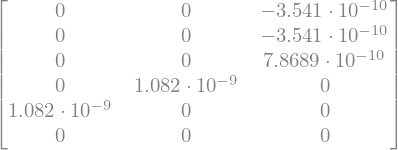

In [5]:
d31sim = (deltaL0/lp)/(V/tp); k1 = d31sim/d31
d33sim = d33*k1; d15sim = d15*k1

import numpy as np; from IPython.display import display, Markdown
import sympy as sp; from sympy import init_printing

deff = sp.Matrix( np.array([
    [0, 0, d31sim],
    [0, 0, d31sim],
    [0, 0, d33sim],
    [0, d15sim, 0],
    [d15sim, 0, 0],
    [0, 0, 0]])  )
init_printing()
deff = deff.applyfunc(lambda x: sp.N(x, 5))
display(Markdown("Effective  couple tensor in d-Form $d^{sim}$ (transpose)= "))
display(deff)


*Calculate the material coefficients $S^{simp}_{11}$ and $S^{simp}_{12}$ and the effective youngs modulus $E^{simp}_{L}$ in the plane normal to thickness direction. Apply the change in young's modulus to other material coefficients. (Hint: Use the d-form and the blocking force).*(**1 point**)<br><br>
_
The blocking force is the force needed to completely constrain the material, leading to zero strain (displacement). We are given the blocking force in the (2)-direction (length direction).$\Longrightarrow s_2 = 0, \, \sigma_2 = \frac{F_B}{A_2} = \frac{256N}{35 \times 0.4 mm^2}$

$$ s_2 = 0 = S^E_{2j} \sigma_j + d_{2j}E_j = S^E_{22} \sigma_2 + d_{23}E_3$$

when assuming that the plate in the width (1) direction expands to a stress free configuration, so that $\sigma_j \neq 0 $ only for $j = 2$. Looking at $S^E$ we see that $S^E_{22}=S^E_{11}$ and $d_{23} = d_{31}$ . $E_3$ is calculated above ($1250 V/mm$)

$$
s_2 = 0 = S^E_{11} \frac{F_B}{A_2} + d^{sim}_{31}E_3 \\
\Longrightarrow  S^{sim}_{11} = -\frac{A_2}{F_B} d^{sim}_{31}E_3
= 2.421 \times 10^{-11} m² / N
 $$
 
In the next step, we calculate $S^{sim}_{12}$, with $s_1 = -650 \times 10³ \mu m/mm$ ( strain in the width direction):
$$
s_1 = S_{1j}\sigma_j + d_{1j}Ej = S_{12}\sigma_2 + d_{13}E_3 \\
.\\
\Longrightarrow S^{sim}_{12} = \frac{(s_1 - d^{sim}_{13}E_3)}{\sigma_2} = (s_1 - d^{sim}_{13}E_3) \cdot \frac{A_2}{F_B} = -1.134 \times 10^{-11} \frac{m²}{N}
$$
Using the the relations between elasticity and compilance tensor for transfersally isotropic materials (see [Wikipedia](https://en.wikipedia.org/wiki/Transverse_isotropy)):<br><br>
![Alt text](compilance_vsEmodulus.png)

With this relation, the effective E-modulus is given as

$$  E^{sim} = \frac{1}{S^{sim}_{11}}  = 41.37\times 10⁹ \frac{N}{m²}= 41.312 GPa$$

This is a change of  $ k_2 = \frac{E^{sim}}{E} = \frac{E^{sim}}{S^{-1}_{11}} =  0.66512$
We apply its inverse to other coefficients, since the change in the elasticity tensor $C$ is invers to the change of the compilance tensor ($S^E = C^{-1}$) :

$$  
S^{sim}_{33} = S_{33} \cdot 1/k_2 = 3.112 \times 10^{-11} \frac{m²}{N} \\
S^{sim}_{44} = S_{44} \cdot 1/k_2 =  6.315 \times 10^{-11} \frac{m²}{N} \\
S^{sim}_{13} = S_{13} \cdot 1/k_2 = -1.278 \times 10^{-11} \frac{m²}{N}
$$
<br><br>

In [ ]:
S11sim = ( -d31sim*(V/tp) )/(FB/A); print("S11sim = ", S11sim)
S12sim = (s1 - d31sim*E3) / (FB/A); print("S12sim = ", S12sim)
Esim = 1 /S11sim; print("Esim = ", Esim/1e9, " GPa")
k2 = Esim / (1/S11); print("k2 = ", k2)

S11sim =  2.420594262295082e-11
S12sim =  -1.1340932377049181e-11
Esim =  41.31216931216931  GPa
k2 =  0.6651259259259259


In [ ]:
S44sim = S44*(1/k2); print("S44sim = ", S44sim)
S33sim = S33*(1/k2); print("S33sim = ", S33sim)  
S13sim = S13*(1/k2); print("S13sim = ", S13sim)  


S44sim =  6.3145937277263e-11
S33sim =  3.11219262295082e-11
S13sim =  -1.277953492516037e-11


*The capacitance of the piezoelectric patch is 90nF . Calculate the relative permittivity $\epsilon_{33}$ and apply the change to $\epsilon_{11}$ .*

To determine the capacitance of the capacitor, use the capacitance formula,
where $C = 90nF$ is the capacitance of the capacitor, $A=l_pw_p$ is the area of the plates of the capacitor, $d=t_p$ is the spacing between the plates, and is the permittivity of the material separating the plates:

$$  C = \frac{\epsilon A}{d} \Longrightarrow \epsilon^{sim}_{33} = \frac{Cd}{A}= \frac{90nF \cdot 0.4mm}{35\times 61 mm²} = 1.686 \times 10^{-8} F/m = 1.686 \times 10^{-8} \frac{As}{Vm} $$

This is a relative change of

$$ k_3 = \frac{\epsilon^{sim}_{33}}{\epsilon_{33}} = \frac{1.686 \times 10^{-8}}{1.5494\times 10^{-8}} = 1.08828 $$

So the effective relative permittivity:

$$ \epsilon_{11}^{sim} = \epsilon_{11} \cdot k_3 = 1.53110 \times 10^{-8}  \frac{As}{Vm}$$

The elasticity tensor $C^{sim}$ is calculated by taking the inverse of $S^{E}$, where we take instead of the entries from the assignment description the calculated "sim" entries. The calculated elasticity tensor is displayed at the bottom of the calculation below.

The effective couple tensor in e-Form $e^{sim}$ is calculated as $e^{sim} = C^{sim} : d^{sim}$. It is displayed at the bottom of the calculation below.

In [ ]:
eps33_sim = (90e-9 * tp)/(wp*lp)
print("eps33_sim = ", eps33_sim)
k3 = eps33_sim / eps33
print("k3=",k3 )

print("eps11_sim=", eps11 * k3); eps11_sim =eps11 * k3



eps33_sim =  1.686182669789227e-08
k3= 1.0882810570473906
eps11_sim= 1.531102619159974e-08


Effective compilance tensor $S^E_{sim}$= 

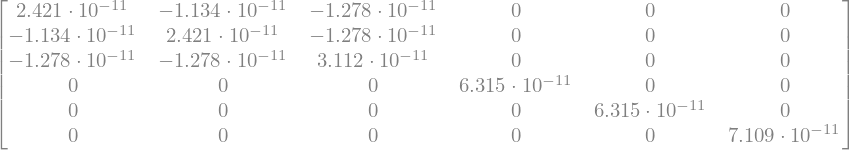

Effective elasticity tensor $C^{sim}$= 

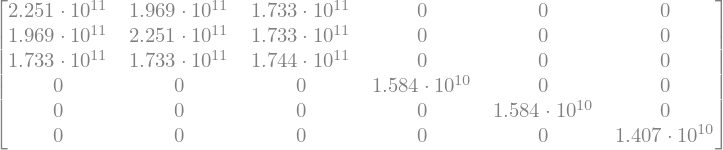

Effective  couple tensor in e-Form $e^{sim}$ (transpose)= 

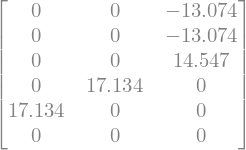

Effective permittivity tensor $\epsilon^{sim}$= 

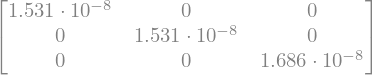

In [ ]:
SE = np.array([
    [S11sim, S12sim, S13sim, 0.000E+00, 0.000E+00, 0.000E+00],
    [S12sim, S11sim, S13sim, 0.000E+00, 0.000E+00, 0.000E+00],
    [S13sim, S13sim, S33sim, 0.000E+00, 0.000E+00, 0.000E+00],
    [0.000E+00, 0.000E+00, 0.000E+00, S44sim, 0.000E+00, 0.000E+00],
    [0.000E+00, 0.000E+00, 0.000E+00, 0.000E+00, S44sim, 0.000E+00],
    [0.000E+00, 0.000E+00, 0.000E+00, 0.000E+00, 0.000E+00, 2 * (S11sim - S12sim)]
])

SE = sp.Matrix(SE)
Elasticity_tensor = SE.inv()

display(Markdown("Effective compilance tensor $S^E_{sim}$= "))

init_printing()
SE_num = SE.applyfunc(lambda x: sp.N(x, 4)); display(SE_num)


display(Markdown("Effective elasticity tensor $C^{sim}$= "))
C_num = Elasticity_tensor.applyfunc(lambda x: sp.N(x, 4));display(C_num)

deff = sp.Matrix(deff)
eeff = Elasticity_tensor@deff
eeff = eeff.applyfunc(lambda x: sp.N(x, 5))
display(Markdown("Effective  couple tensor in e-Form $e^{sim}$ (transpose)= "))

display(eeff)


display(Markdown("Effective permittivity tensor $\epsilon^{sim}$= "))
epseff = sp.Matrix( np.array([
    [eps11_sim, 0, 0],
    [0, eps11_sim, 0],
    [0, 0, eps33_sim],]) ) 
epseff = epseff.applyfunc(lambda x: sp.N(x, 4)); display(epseff)
